## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('priv_data_clean.csv')
df.head()

,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,...,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Airplane.Type,Event.Day,Event.Month,Event.Year
0,ID,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,...,Unknown,2.0,2.0,100.000000,0.000000,100.0,Private,24,10,1948
1,CA,United States,Destroyed,Piper,Pa24-180,1.0,Reciprocating,Personal,4.0,0.0,...,Unknown,4.0,4.0,100.000000,0.000000,100.0,Private,19,7,1962
2,VA,United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,...,Instrumental Meteorological Conditions,3.0,3.0,100.000000,0.000000,100.0,Private,30,8,1974
3,CA,United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,...,Instrumental Meteorological Conditions,2.0,2.0,100.000000,0.000000,100.0,Private,19,6,1977
4,MA,United States,Substantial,Mcdonnel Douglas,Dc9,2.0,Turbo Fan,Unknown,0.0,0.0,...,Visual Meteorological Conditions,45.0,1.0,2.222222,97.777778,0.0,Private,17,9,1979


## Visualize KPIs

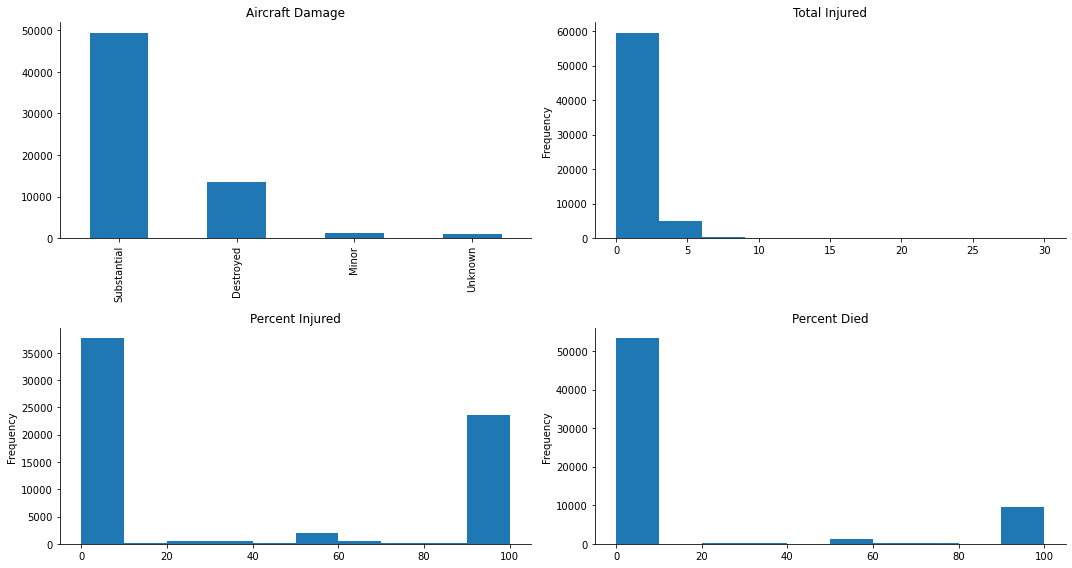

In [4]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [5]:
popular_makes = df['Make'].value_counts()
popular_makes = list(popular_makes[popular_makes > 100].index)

print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Bell', 'Mooney', 'Grumman', 'Bellanca', 'Robinson', 'Hughes', 'Air Tractor', 'Boeing', 'Aeronca', 'Schweizer', 'Maule', 'Champion', 'Mcdonnel Douglas', 'Stinson', 'Luscombe', 'Aero Commander', 'De Havilland', 'Taylorcraft', 'North American', 'Aerospatiale', 'Hiller', 'Rockwell', 'Enstrom', 'Cirrus Design Corp', 'Robinson Helicopter', 'Grumman American', 'Ayres', 'Eurocopter', 'Robinson Helicopter Company', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Embraer', 'Lake', 'Waco', 'Fairchild', 'Aviat', 'Mitsubishi', 'GrummanSchweizer', 'Airbus', 'Socata', 'Ryan', 'Helio', 'Cirrus', 'Learjet']


## Damage Index

In [6]:
pop_means_df = df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = df[df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    
    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [7]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,1.575972,849.0,62.468668,20.805772,6.407597,1.081848,1.704962
Airbus,0.940171,117.0,28.992269,18.016278,7.336182,2.072791,1.948778
Cessna,2.340602,26092.0,64.264303,35.616887,14.190254,1.000000,2.340602
Robinson,2.354167,1008.0,57.630622,41.972553,18.715278,1.000000,2.354167
Piper,2.424181,14350.0,58.748910,41.167466,18.578451,1.000000,2.424181
Bell,2.430877,2416.0,52.591073,46.995019,14.626752,1.000000,2.430877
Bellanca,2.434570,1024.0,55.102539,44.897461,18.953451,1.000000,2.434570
Grumman,2.481707,1148.0,66.202872,33.797128,9.503444,1.000000,2.481707
Hughes,2.355606,883.0,57.835032,42.051718,10.349188,1.062215,2.502160
Air Tractor,2.338747,862.0,59.416087,40.583913,14.365816,1.074250,2.512399


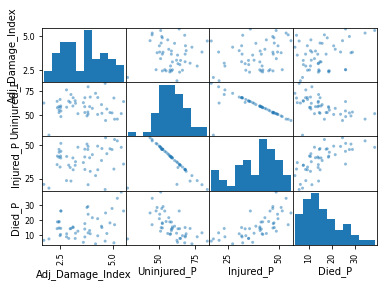

In [8]:
pd.plotting.scatter_matrix(di_df[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

In [9]:
di_df = di_df.sort_values(by = 'Adj_Damage_Index')[:5]
di_df

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,1.575972,849.0,62.468668,20.805772,6.407597,1.081848,1.704962
Airbus,0.940171,117.0,28.992269,18.016278,7.336182,2.072791,1.948778
Cessna,2.340602,26092.0,64.264303,35.616887,14.190254,1.000000,2.340602
Robinson,2.354167,1008.0,57.630622,41.972553,18.715278,1.000000,2.354167
Piper,2.424181,14350.0,58.748910,41.167466,18.578451,1.000000,2.424181


In [30]:
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed')& (df['Percent.Died'] == 0) & (df['Total.Passengers'] != 0)]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Percent.Died'] == 0)& (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]

In [76]:
d_d = best_dest['Model'].value_counts().to_dict()
d_s = best_subs['Model'].value_counts().to_dict()
d_m = best_minor['Model'].value_counts().to_dict()
all_keys = set()
all_keys.update(d_d.keys())
all_keys.update(d_s.keys())
all_keys.update(d_m.keys())
r_d  = {}
for key in all_keys:
    r_d[key] = d_d.get(key, 0) + d_s.get(key, 0) + d_m.get(key, 0)
denominator = df['Model'].value_counts().to_dict().get(key, 1)
result_dict[key] = r_d / denominator

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [46]:
mp_num = (best_dest['Model'].value_counts() + best_subs['Model'].value_counts() + best_minor['Model'].value_counts())
model_performance =  (mp_num/df['Model'].value_counts())
model_vc = df['Model'].value_counts()

In [59]:
mp_num = best_dest['Model'].value_counts() #+ best_subs['Model'].value_counts() 
mp_num

152          153
Pa-28-140     92
172           92
G-164A        86
150           78
            ... 
R-22A          1
B-47G2A        1
St-108-2       1
Mu-2B-40       1
Tc-45J         1
Name: Model, Length: 1155, dtype: int64

In [52]:
best_subs['Model'].value_counts() 

152          1060
172           972
172N          624
172M          432
Pa-28-140     422
             ... 
A4L             1
7 Gcbc          1
A-1C-180        1
8Jcab           1
Be58            1
Name: Model, Length: 2913, dtype: int64

In [35]:
df.isna().sum()

Location                  0
Country                   0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Total.Passengers          0
Total.Injured             0
Percent.Injured           0
Percent.Uninjured         0
Percent.Died              0
Airplane.Type             0
Event.Day                 0
Event.Month               0
Event.Year                0
dtype: int64

In [37]:
model_vc.isna().sum()

0

In [38]:
model_performance.isna().sum()

4491

In [33]:
model_pwdc = pd.concat({'Performance':model_performance, 'Amount of incidents':model_vc}, axis=1)
model_pwdc.sort_values(by='Amount of incidents',ascending=False)

,Performance,Amount of incidents
152,0.522912,2335
172,0.643761,1659
172N,0.612621,1141
Pa-28-140,0.565313,911
150,0.549191,803
...,...,...
C-T188C,NaN,1
C-T210,NaN,1
C-T210N,NaN,1
C-U206B,NaN,1


In [13]:
model_pwdc = model_pwdc.loc[model_pwdc['Amount of incidents'] >= 20]

In [19]:
model_pwdc.sort_values(by='Performance')

,Performance,Amount of incidents
As350,0.000000,27
J35,0.000000,38
J3,0.000000,31
J-3,0.000000,67
H35,0.000000,54
...,...,...
R22 Beta,0.853933,267
172S,0.864499,369
172R,0.874251,167
At-502B,0.900000,70


In [15]:
joint = df.join(model_pwdc, how='outer',on='Model').dropna()
joint

,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,...,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Airplane.Type,Event.Day,Event.Month,Event.Year,Performance,Amount of incidents
0,ID,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,...,2.0,100.0,0.0,100.0,Private,24,10,1948,0.742268,97.0
1087,KY,United States,Substantial,Stinson,108-3,1.0,Reciprocating,Personal,0.0,0.0,...,2.0,100.0,0.0,0.0,Private,18,5,1982,0.742268,97.0
1438,WA,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,0.0,2.0,...,2.0,100.0,0.0,0.0,Private,23,6,1982,0.742268,97.0
2767,WA,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,...,2.0,100.0,0.0,100.0,Private,13,11,1982,0.742268,97.0
3991,WY,United States,Substantial,Stinson,108-3,1.0,Reciprocating,Personal,0.0,0.0,...,0.0,0.0,100.0,0.0,Private,15,5,1983,0.742268,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62444,CA,United States,Substantial,Piper,Pa 12,1.0,Reciprocating,Personal,0.0,0.0,...,0.0,0.0,100.0,0.0,Private,27,9,2019,0.000000,37.0
62907,AK,United States,Substantial,Piper,Pa 12,1.0,Reciprocating,Personal,0.0,0.0,...,0.0,0.0,100.0,0.0,Private,6,6,2020,0.000000,37.0
62912,AK,United States,Substantial,Piper,Pa 12,1.0,Reciprocating,Instructional,0.0,0.0,...,0.0,0.0,100.0,0.0,Private,8,6,2020,0.000000,37.0
63021,ME,United States,Substantial,Piper,Pa 12,1.0,Reciprocating,Personal,0.0,0.0,...,0.0,0.0,100.0,0.0,Private,18,7,2020,0.000000,37.0


In [16]:
joint.to_csv('priv_analyzed.csv')

In [17]:
joint.groupby('Model').mean(numeric_only=True)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Event.Day,Event.Month,Event.Year,Performance,Amount of incidents
Model,,,,,,,,,,,,,,,
100,1.192308,0.346154,0.211538,0.480769,1.173077,2.211538,1.038462,50.320513,49.679487,14.102564,16.192308,6.750000,1996.923077,0.596154,52.0
100-180,1.000000,0.350000,0.250000,0.450000,1.150000,2.200000,1.050000,46.250000,53.750000,13.750000,14.400000,6.050000,1993.700000,0.000000,20.0
108,1.000000,0.134021,0.298969,0.309278,0.969072,1.711340,0.742268,40.807560,59.192440,8.247423,15.288660,6.670103,2004.268041,0.000000,97.0
108-1,1.000000,0.117647,0.094118,0.211765,1.458824,1.882353,0.423529,20.980392,79.019608,5.882353,15.505882,6.223529,1995.505882,0.000000,85.0
108-2,1.000000,0.244186,0.302326,0.244186,1.116279,1.906977,0.790698,43.410853,56.589147,9.689922,14.953488,6.348837,1994.244186,0.000000,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uh-1H,1.000000,0.718750,0.125000,0.437500,1.062500,2.343750,1.281250,62.946429,37.053571,34.791667,14.781250,6.125000,2003.375000,0.000000,32.0
Upf-7,1.000000,0.133333,0.155556,0.511111,1.355556,2.155556,0.800000,40.555556,59.444444,8.148148,12.955556,6.622222,1994.511111,0.000000,45.0
V35,1.000000,0.941176,0.088235,0.264706,0.852941,2.147059,1.294118,54.411765,45.588235,39.264706,15.779412,6.838235,2001.573529,0.470588,68.0


In [29]:
model_pwdc.loc[model_pwdc['Performance'] != 0].sort_values(by='Performance')

,Performance,Amount of incidents
767,0.285714,14
E18S,0.292308,65
Pa-60-600,0.307692,13
P206A,0.333333,9
E90,0.333333,12
...,...,...
At-502B,0.900000,70
S2R-G10,0.923077,13
At-401,0.933333,75
Sf50,1.000000,5
